# <center> Clustering
    
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

# Imports

In [1]:
import numpy as np
import pandas as pd
import altair as alt

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

# Generate sintetic data

In [2]:
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8  * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1]  + .1  * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2]  + .2  * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3]  + .3  * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2]  + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6]   + 2   * np.random.randn(n_points_per_cluster, 2)
sintetic = np.vstack((C1, C2, C3, C4, C5, C6))
sintetic = pd.DataFrame(sintetic, columns=["x", "y"])
sintetic.head()

,x,y
0,-3.588758,-1.679874
1,-4.217010,-0.207285
2,-3.505954,-2.781822
3,-4.239929,-2.121086
4,-5.082575,-1.671521


In [3]:
alt.Chart(sintetic).mark_circle().encode(x='x', y='y')

alt.Chart(...)

# K-means (Busca centroides de los grupos)

In [4]:
from sklearn.cluster import KMeans

# Do K-means
kmeans = KMeans(n_clusters=4, random_state=0).fit(sintetic[["x", "y"]])

# Save data
sintetic["kmeans4"] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=["x", "y"])

# Plot
points  = alt.Chart(sintetic).mark_circle().encode(x='x', y='y', color="kmeans4:N")
centers = alt.Chart(centers).mark_circle(color='black', size=100).encode(x='x', y='y')
points + centers

alt.LayerChart(...)

# DBSCAN (Busca densidades contiguas)

In [5]:
from sklearn.cluster import DBSCAN

dbscan  = DBSCAN(eps=1).fit(sintetic[["x", "y"]])
sintetic["dbscan"] = dbscan.labels_

alt.Chart(sintetic).mark_circle().encode(x='x', y='y', color="dbscan:N")

alt.Chart(...)

# OPTICS: Busca densidades (variables) contiguas

In [6]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05).fit(sintetic[["x", "y"]])
sintetic["optics"] = optics.labels_

alt.Chart(sintetic).mark_circle().encode(x='x', y='y', color="optics:N")

alt.Chart(...)

# Clustering jerárquico
- **Agglomerative** — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
- **Divisive** — Top down approach. Start with a single cluster than break it up into smaller clusters.

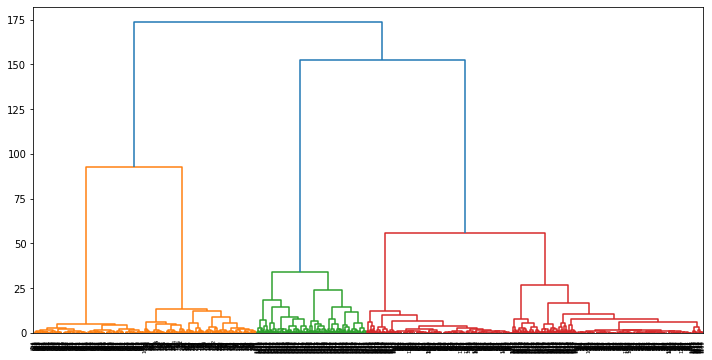

In [7]:
Z = hierarchy.linkage(sintetic[["x", "y"]], 'ward')
plt.figure(figsize=(12,6))
dn = hierarchy.dendrogram(Z)

In [8]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering().fit(sintetic[["x", "y"]])
sintetic["hierarchical"] = hierarchical.labels_

alt.Chart(sintetic).mark_circle().encode(x='x', y='y', color="hierarchical:N")

alt.Chart(...)